# Plot in R
Ref: [NTUTrainRL2](https://github.com/yaojenkuo/NTUTrainRL2), [FLOWINGDATA](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/)
* I. [R Base Plotting](#I.-R-Base-Plotting)
    * I.I. [Scatter plot](#I.I.-Scatter-plot)
    * I.II. [Line chart](#I.II.-Line-chart)
    * I.III. [Bar chart](#I.III.-Bar-chart)
    * I.IV. [Histogram](#I.IV.-Histogram)
    * I.V. [Box plot](#I.V.-Box-plot)
    * I.VI. [Pie chart](#I.VI.-Pie-chart)
* II. [ggplot](#II.-ggplot)
    * II.I. [Scatter plot](#II.I.-Scatter-plot)
    * II.II. [Line chart](#II.II.-Line-chart)
    * II.III. [Bar chart](#II.III.-Bar-chart)
    * II.IV. [Histogram](#II.IV.-Histogram)
    * II.V. [Box plot](#II.V.-Box-plot)
    * II.VI. [Pie chart](#II.VI.-Pie-chart)
    * II.VII. [Other usage](#II.VII.-Other-usage)
        * i. [Function plot](#i.-Function-plot)
        * ii. [Heat map](#ii.-Heat-map)
        * iii. [Mosaic plot](#iii.-Mosaic-plot)
* III. [Interactive plot](#III.-Interactive-plot)
    * Leaflet
    * Plotly
    * Shiny

# I. R Base Plotting

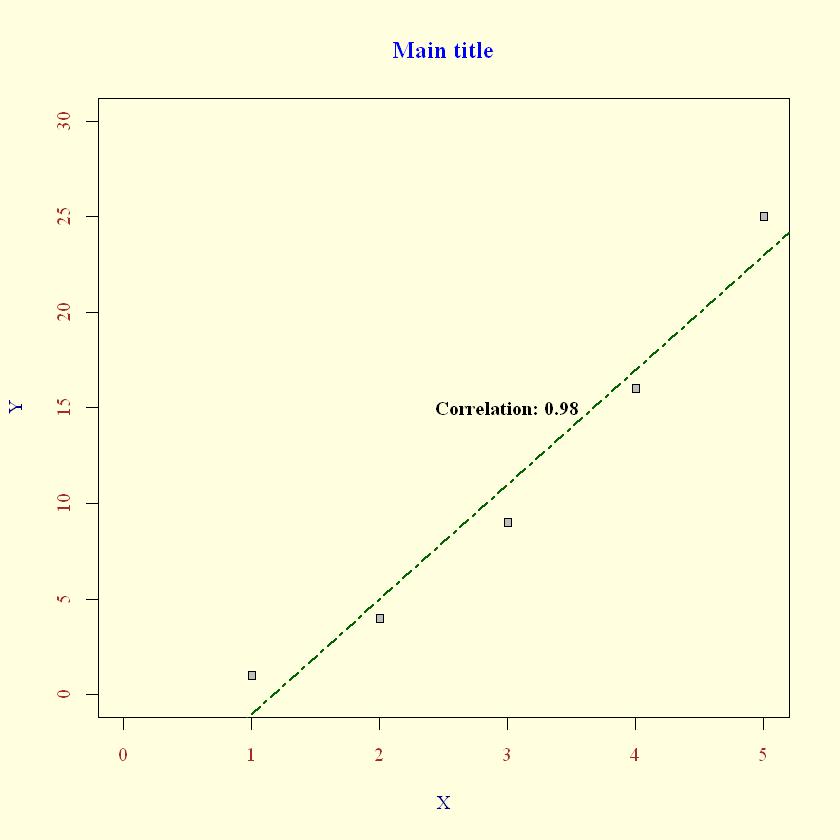

In [1]:
# Overview
x <- c(1,2,3,4,5)
y <- c(1,4,9,16,25)
par(mfrow=c(1,1),bg="lightyellow",family="serif",font=2)
plot(x,y,
    main="Main title",xlab="X",ylab="Y",col.main="blue",col.lab="darkblue",col.axis="brown",
    xlim=c(0,5),ylim=c(0,30),las=0,
    pch=22,col="black",bg="grey")
abline(lm(y~x),col="darkgreen",,lty=6,lwd=2)
correlation <- round(cor(x,y),2)
text(3,15,paste("Correlation: ",correlation,sep=""))

## I.I. Scatter plot

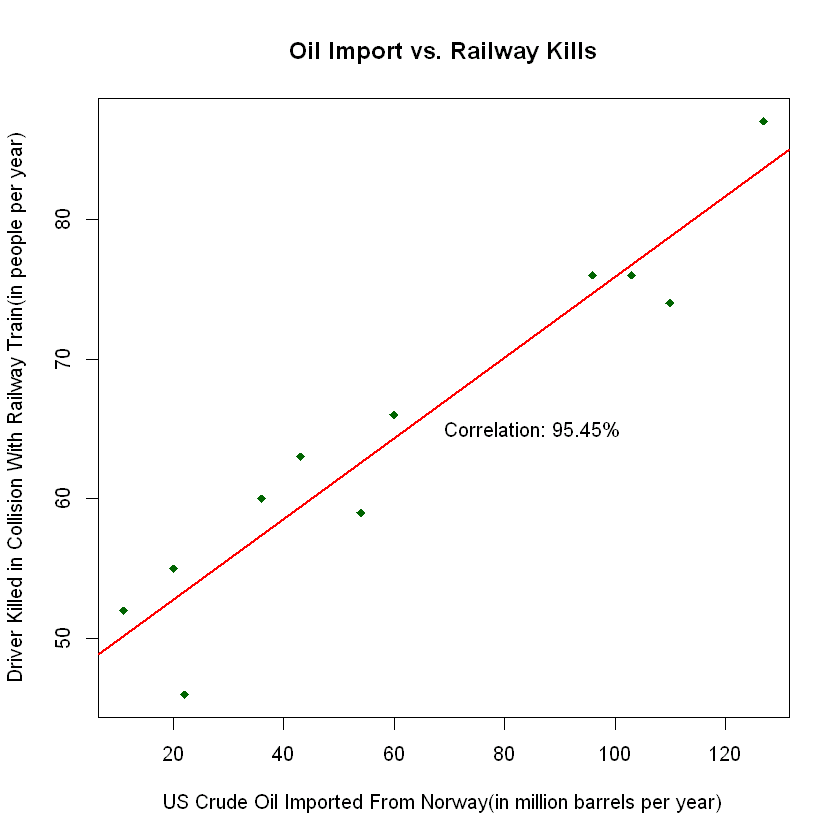

In [2]:
#From 1999 to 2009, US Dept. of Energy and Centers of Disease Control & Prevention
par(mfrow=c(1,1))
usCrudeOilFromNorway <- c(96, 110, 103, 127, 60, 54, 43, 36, 20, 11, 22)
driverKilledInCollisionWithRailwayTrain <- c(76, 74, 76, 87, 66, 59, 63, 60, 55, 52, 46)
plot(usCrudeOilFromNorway, driverKilledInCollisionWithRailwayTrain, main="Oil Import vs. Railway Kills", xlab="US Crude Oil Imported From Norway(in million barrels per year)", ylab="Driver Killed in Collision With Railway Train(in people per year)", pch=18, col="darkgreen", bg="darkgreen")
abline(lm(driverKilledInCollisionWithRailwayTrain~usCrudeOilFromNorway), col="red", lwd=2) #add regression line
correlation <- round(cor(usCrudeOilFromNorway, driverKilledInCollisionWithRailwayTrain), 4)*100
text(85, 65, paste("Correlation: ",correlation, "%", sep=""))

In [3]:
# Data used for plot
library(reshape2)
head(tips)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


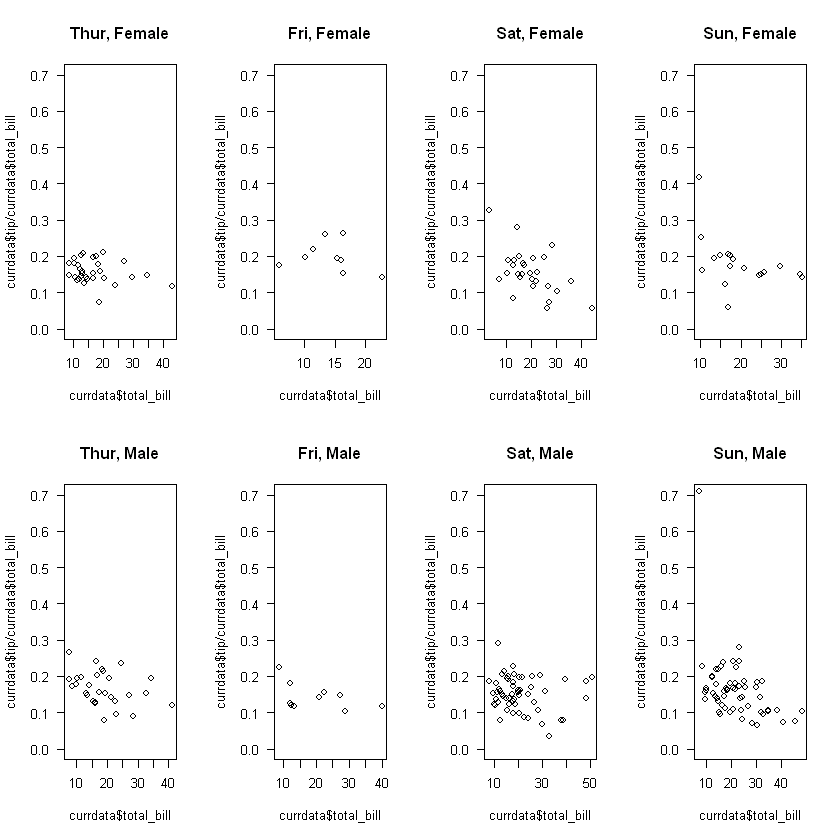

In [4]:
par(mfrow=c(2,4))
days <- c("Thur", "Fri", "Sat", "Sun")
sexes <- unique(tips$sex)
for (i in 1:length(sexes)) {
  for (j in 1:length(days)) {
    currdata <- tips[tips$day == days[j] & tips$sex == sexes[i],]
    plot(currdata$total_bill, currdata$tip/currdata$total_bill,
        main=paste(days[j], sexes[i], sep=", "), ylim=c(0,0.7), las=1)
  }
}

## I.II. Line chart

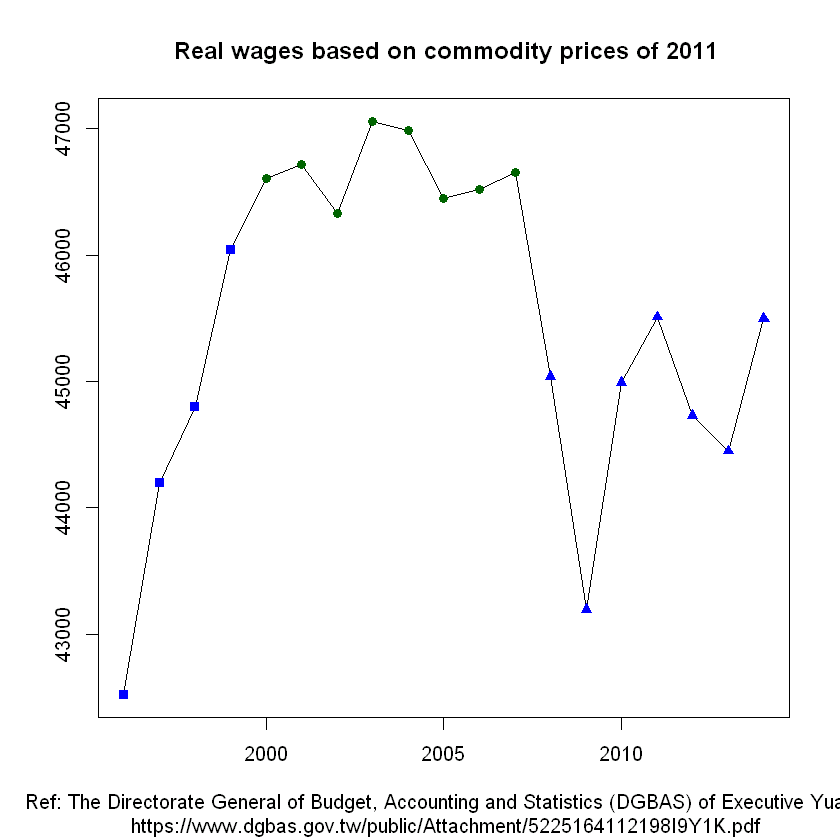

In [5]:
year <- c(1996, 1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,   2014)
salaryReal <- c(42520, 44195, 44798, 46040, 46605, 46716, 46330, 47058, 46989, 46447, 46521, 46650, 45038, 43193, 44989, 45508, 44726, 44446, 45494)
plot(year, salaryReal, type="l", main=paste(" Real wages based on commodity prices of 2011"), sub=paste("Ref: The Directorate General of Budget, Accounting and Statistics (DGBAS) of Executive Yuan","\n","https://www.dgbas.gov.tw/public/Attachment/5225164112198I9Y1K.pdf"),  lwd=1, xlab="", ylab="")
points(year[1:4], salaryReal[1:4], col="blue", bg="blue", pch=15)
points(year[5:12], salaryReal[5:12], col="darkgreen", bg="darkgreen", pch=16)
points(year[13:length(year)], salaryReal[13:length(salaryReal)], col="blue", bg="blue", pch=17)

## I.III. Bar chart

,sex,time,total_bill
1,Female,Lunch,13.53
2,Female,Dinner,16.81
3,Male,Lunch,16.24
4,Male,Dinner,17.42


,Lunch,Dinner
Female,13.53,16.81
Male,16.24,17.42


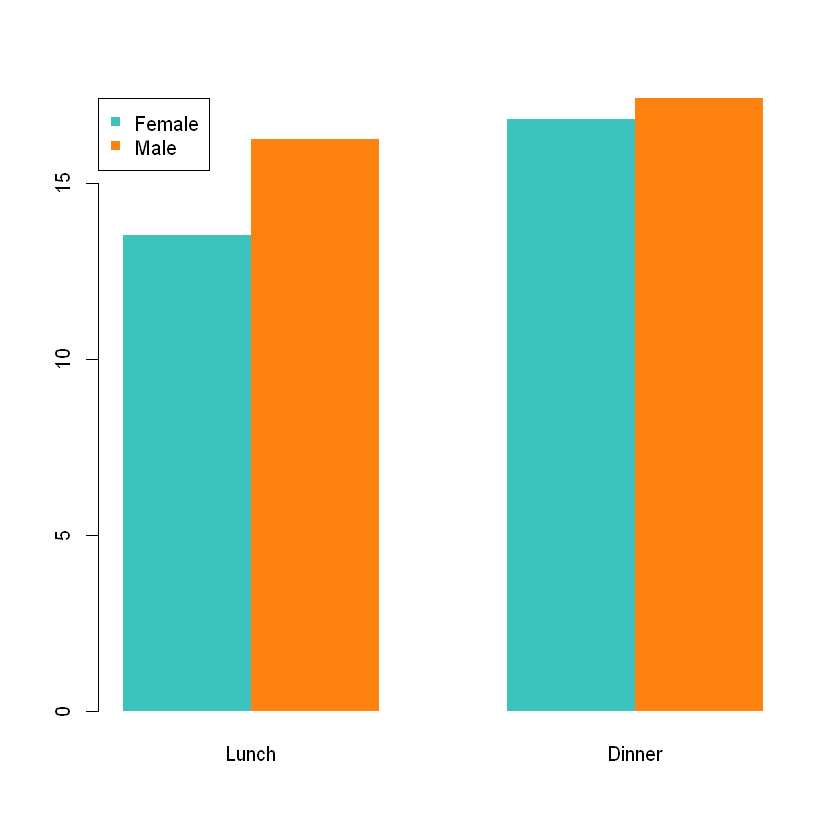

In [6]:
dat1 <- data.frame(
  sex = factor(c("Female","Female","Male","Male")),
  time = factor(c("Lunch","Dinner","Lunch","Dinner"), levels=c("Lunch","Dinner")),
  total_bill = c(13.53, 16.81, 16.24, 17.42)
)
dat1
dat1mat <- matrix( dat1$total_bill,
                   nrow = 2,
                   byrow=TRUE,
                   dimnames = list(c("Female", "Male"), c("Lunch", "Dinner"))
                   )
dat1mat
mf_col <- c("#3CC3BD", "#FD8210")
barplot(dat1mat, beside = TRUE, border=NA, col=mf_col)
legend("topleft", row.names(dat1mat), pch=15, col=mf_col)

## I.IV. Histogram

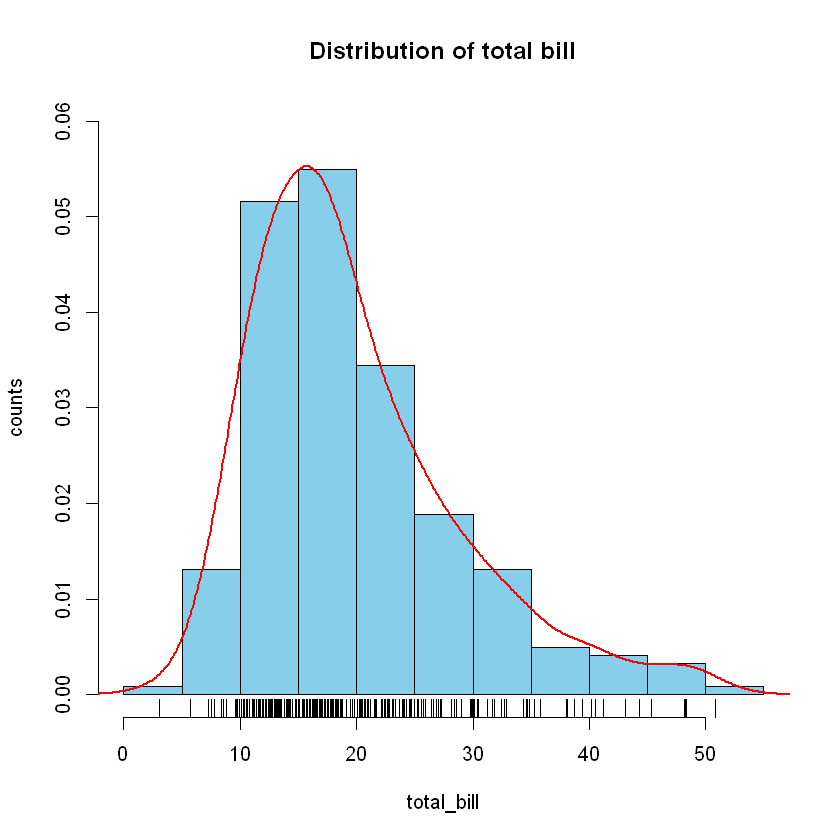

In [7]:
par(mfrow=c(1,1))
hist(tips$total_bill, xlab='total_bill', ylab='counts', main='Distribution of total bill', col="skyblue", freq=FALSE, ylim=c(0,0.06))
rug(jitter(tips$total_bill))
lines(density(tips$total_bill, na.rm=TRUE), col="red", lwd=2)

## I.V. Box plot

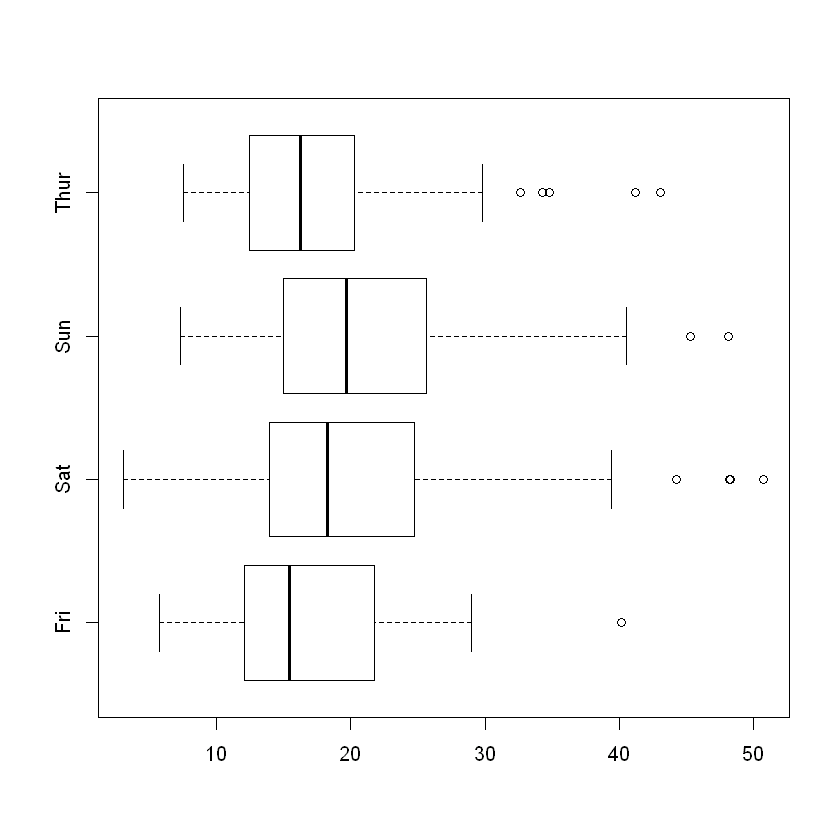

In [8]:
par(mfrow=c(1,1))
boxplot(tips$total_bill ~ tips$day, data=tips, horizontal=TRUE)

## I.VI. Pie chart

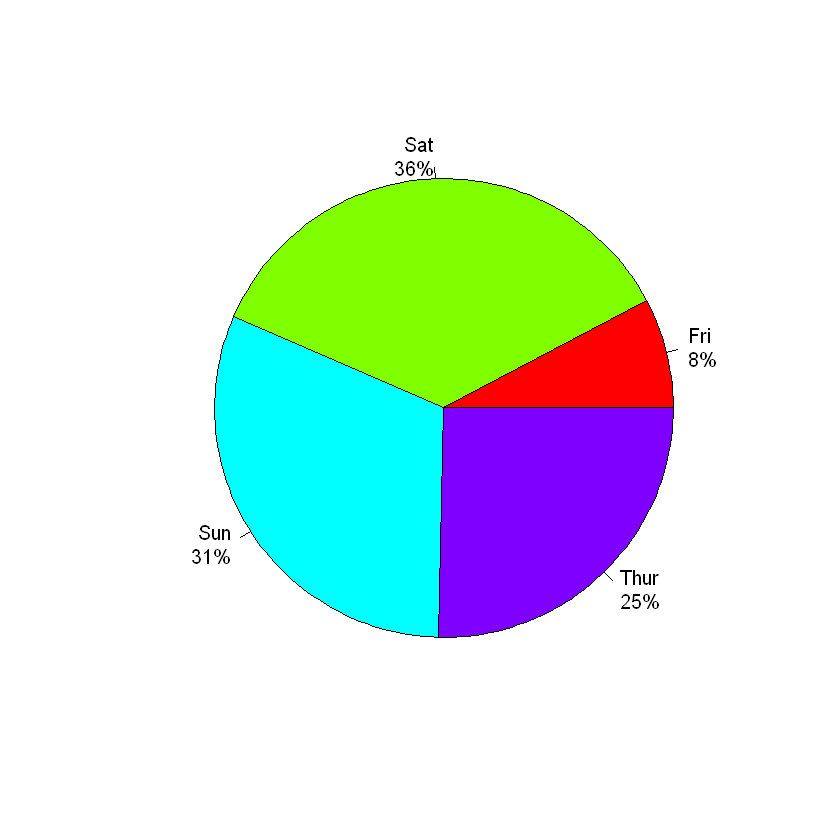

In [9]:
slices <- as.vector(table(tips$day))
percentage <- round(slices/sum(slices)*100)
labels <- paste(names(table(tips$day)), "\n", percentage, "%", sep="")
pie(slices, labels=labels, col=rainbow(length(labels)))

# II. ggplot

In [10]:
library(ggplot2)
library(gridExtra)

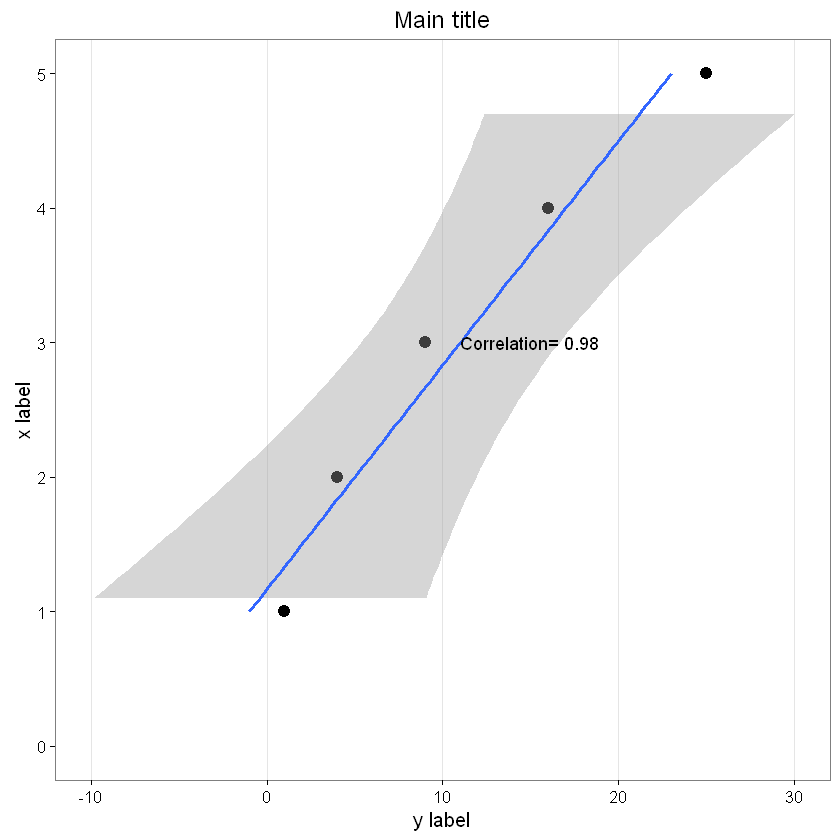

In [11]:
# Overview
x <- c(1,2,3,4,5)
y <- c(1,4,9,16,25)
xydata <- data.frame(x,y)
correlation <- round(cor(x,y),2)
ggplot(xydata,aes(x=x,y=y))+
theme_bw()+
geom_point(size=3)+
ggtitle('Main title')+xlab('x label')+ylab('y label')+
stat_smooth(method=lm, level=0.99)+annotate("text", label=paste("Correlation=",correlation), x=3, y=15)+
xlim(0,5)+ylim(-10,30)+coord_flip()+
theme(panel.grid.major.y=element_blank(), panel.grid.minor=element_blank())+
guides(fill=FALSE)

## II.I. Scatter plot

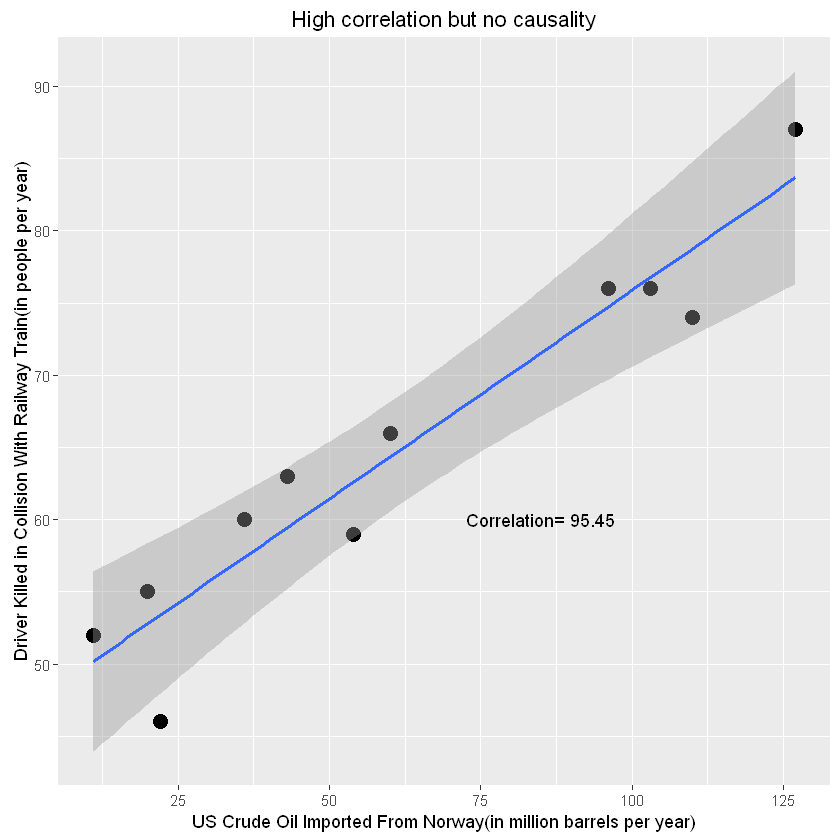

In [12]:
#From 1999 to 2009, US Dept. of Energy and Centers of Disease Control & Prevention
usCrudeOilFromNorway <- c(96, 110, 103, 127, 60, 54, 43, 36, 20, 11, 22)
driverKilledInCollisionWithRailwayTrain <- c(76, 74, 76, 87, 66, 59, 63, 60, 55, 52, 46)
scatterPlotData <- data.frame(usCrudeOilFromNorway, driverKilledInCollisionWithRailwayTrain)
scatterPlot <- ggplot(scatterPlotData, aes(x=usCrudeOilFromNorway, y=driverKilledInCollisionWithRailwayTrain)) + geom_point(size=4)+ylab("Driver Killed in Collision With Railway Train(in people per year)")+xlab("US Crude Oil Imported From Norway(in million barrels per year)")+ggtitle("High correlation but no causality")
correlation <- round(cor(usCrudeOilFromNorway, driverKilledInCollisionWithRailwayTrain), 4)*100
#add regression line and text
scatterPlot+stat_smooth(method=lm, level=0.99)+annotate("text", label=paste("Correlation=",correlation), x=85, y=60)

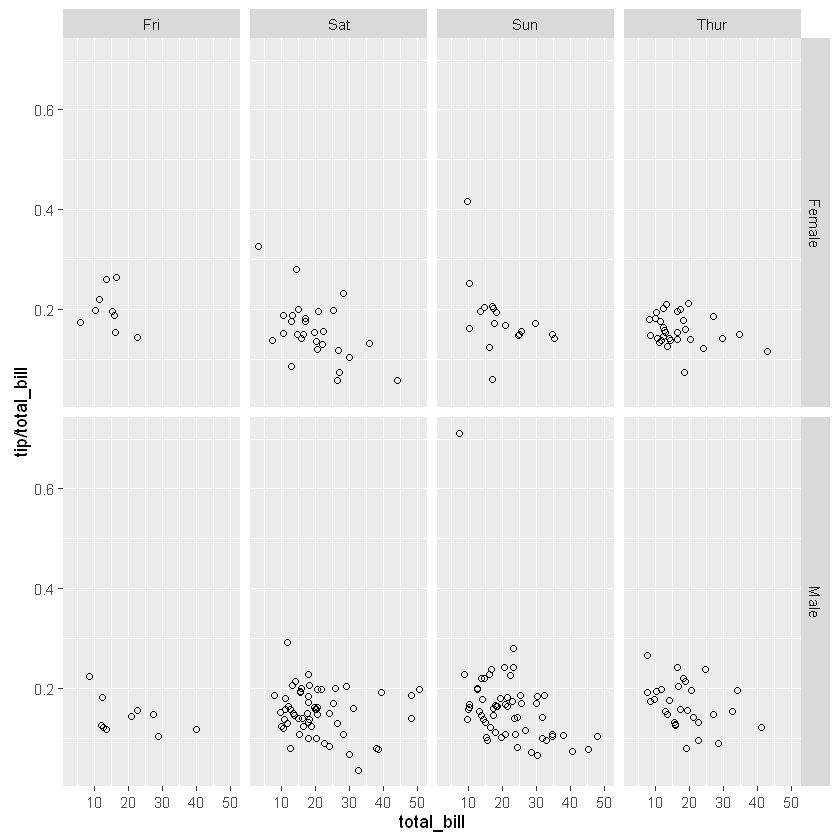

In [13]:
sp <- ggplot(tips, aes(x=total_bill, y=tip/total_bill)) + geom_point(shape=1)
sp + facet_grid(sex ~ day)

## II.II. Line chart

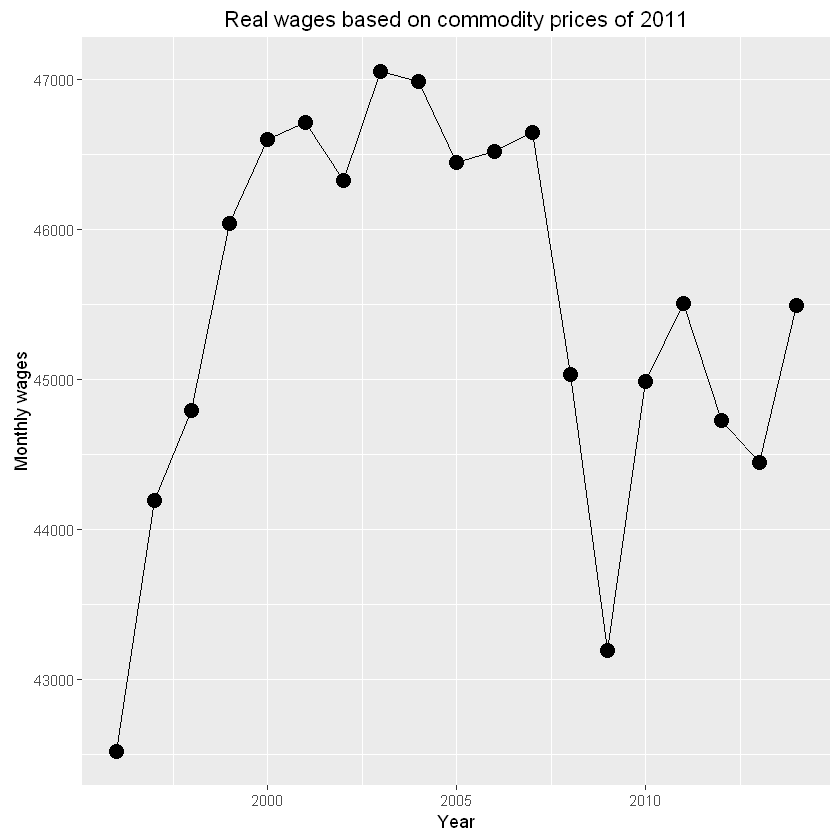

In [14]:
year <- c(1996, 1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,   2014)
salaryReal <- c(42520, 44195, 44798, 46040, 46605, 46716, 46330, 47058, 46989, 46447, 46521, 46650, 45038, 43193, 44989, 45508, 44726, 44446, 45494)
lineGraphData <- data.frame(year, salaryReal)
ggplot(lineGraphData, aes(x=year, y=salaryReal)) + geom_line() + geom_point(size=4)+ggtitle("Real wages based on commodity prices of 2011")+xlab("Year")+ylab("Monthly wages")

## II.III. Bar chart

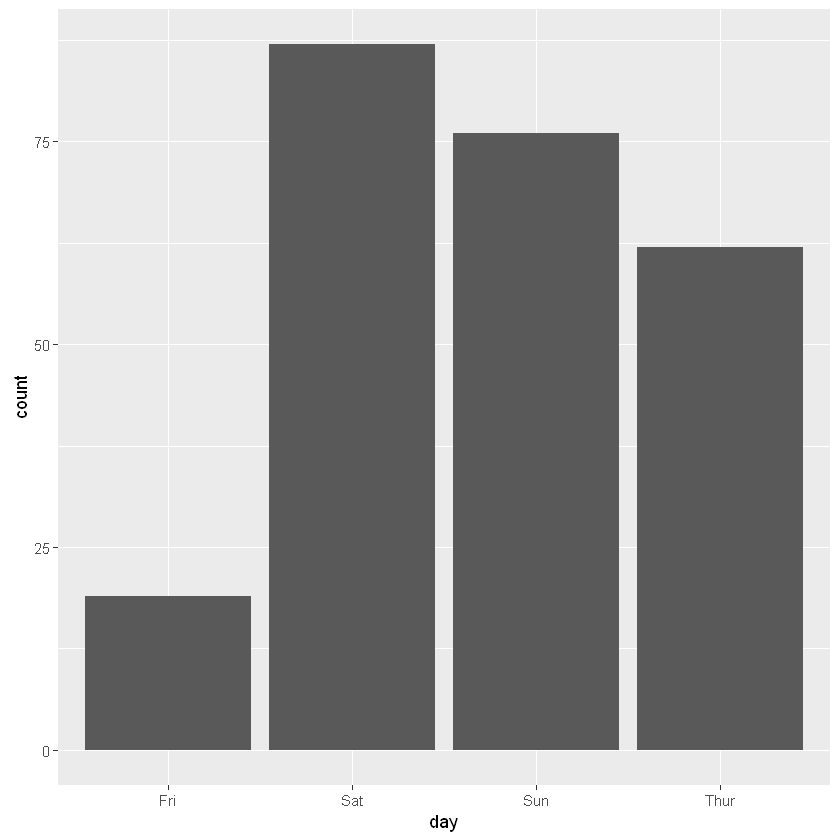

In [15]:
ggplot(data=tips, aes(x=day)) +
  geom_bar(stat="count")

## II.IV. Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


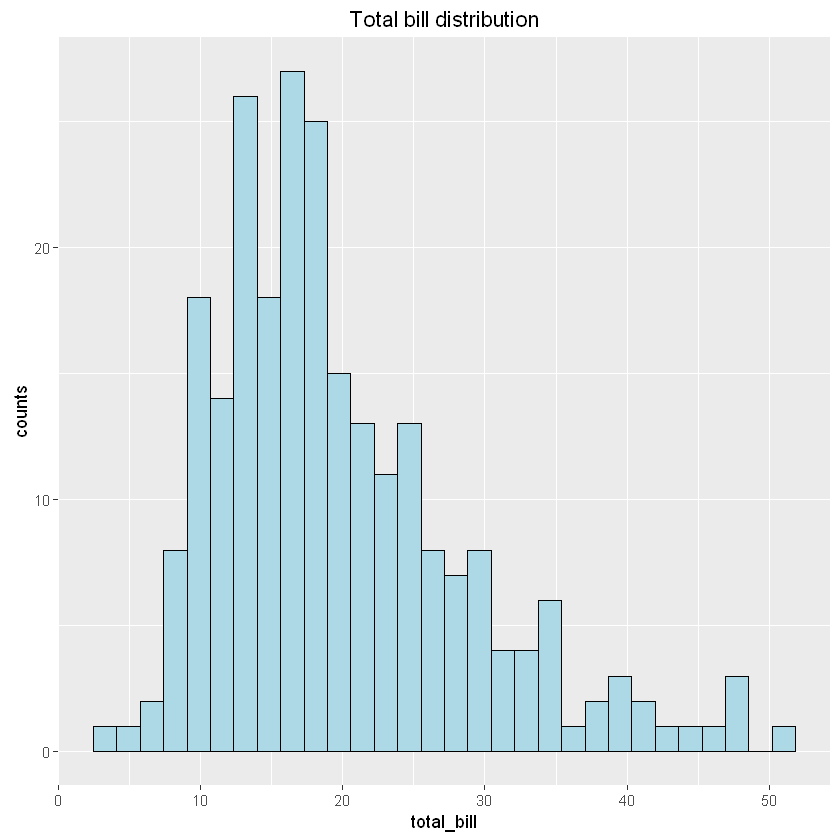

In [16]:
ggplot(tips, aes(x=total_bill))+geom_histogram(fill='lightblue', colour='black')+ggtitle('Total bill distribution')+ylab('counts')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


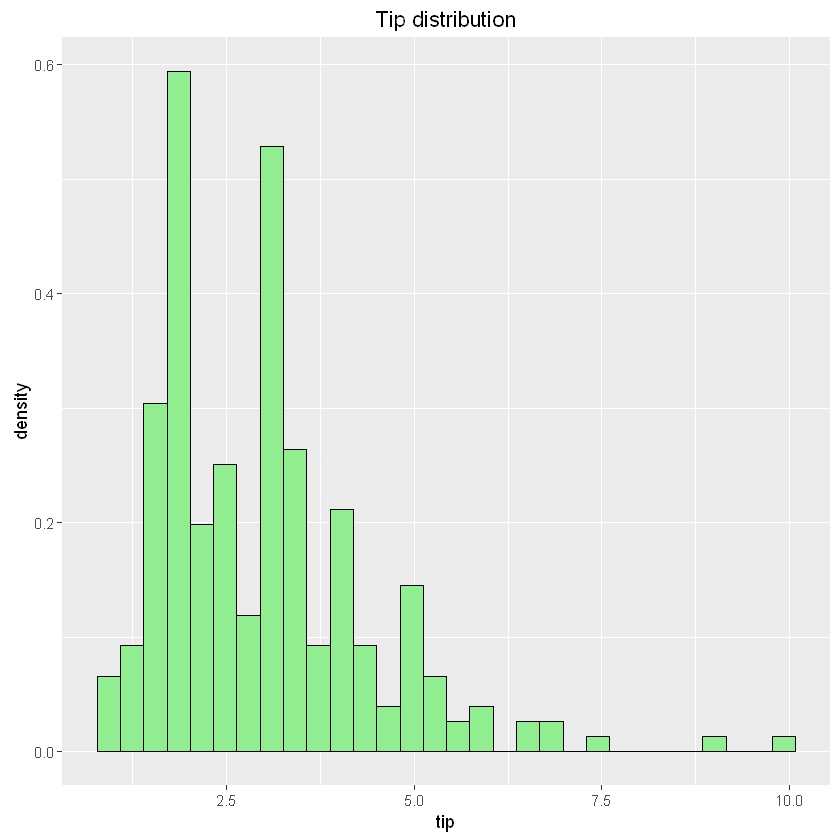

In [17]:
ggplot(tips, aes(x=tip, ..density..))+geom_histogram(fill='lightgreen', colour='black')+ggtitle('Tip distribution')+ylab('density')

## II.V. Box plot

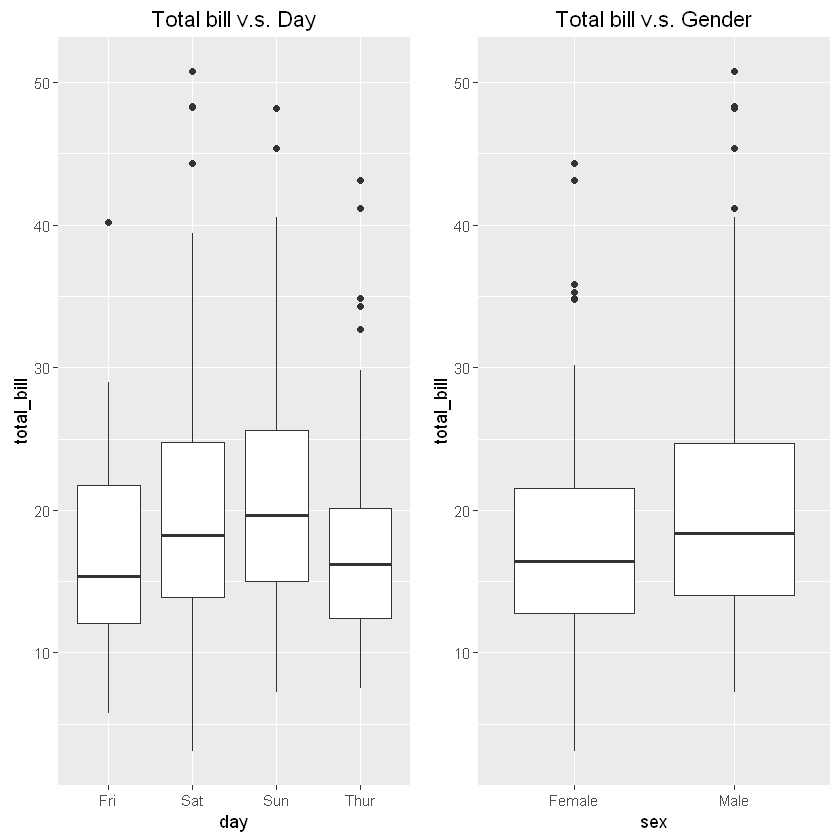

In [18]:
p1 <- ggplot(tips, aes(x=day, y=total_bill))+geom_boxplot()+ggtitle("Total bill v.s. Day")
p2 <- ggplot(tips, aes(x=sex, y=total_bill))+geom_boxplot()+ggtitle("Total bill v.s. Gender")
grid.arrange(p1, p2, ncol = 2)

## II.VI. Pie chart

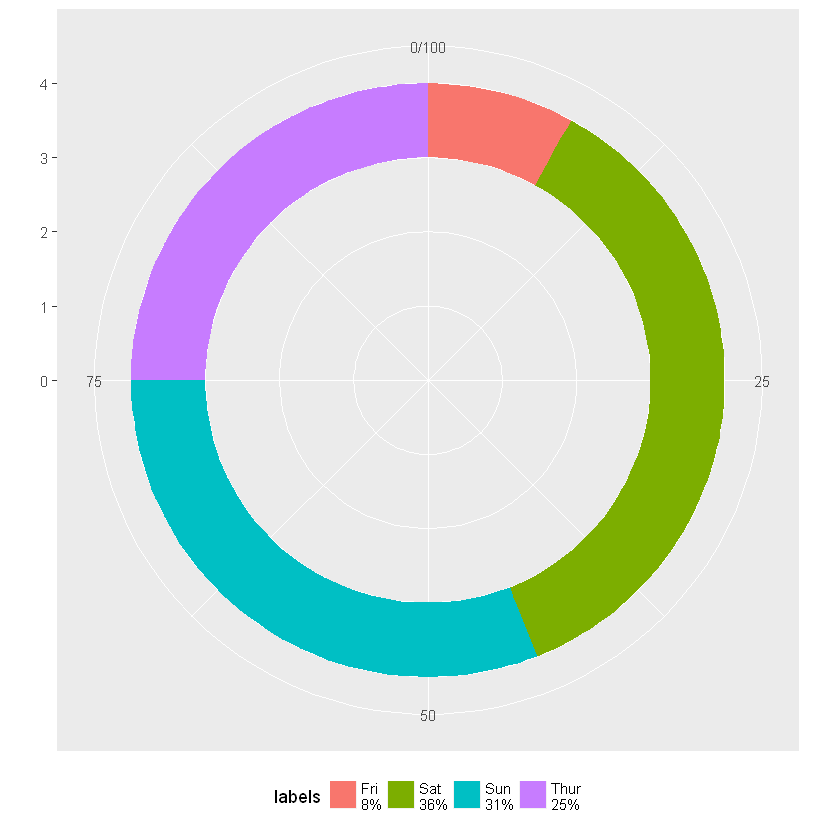

In [19]:
slices <- as.vector(table(tips$day))
percentage <- round(slices/sum(slices)*100)
labels <- paste(names(table(tips$day)), "\n", percentage, "%", sep="")
ymax <- cumsum(percentage)
ymin <- c(0, head(ymax, n=-1))
donutData <- data.frame(labels, percentage, ymax, ymin)
ggplot(donutData)+geom_rect(aes(fill=labels, ymax=ymax, ymin=ymin, xmax=4, xmin=3))+coord_polar(theta="y")+xlim(c(0, 4))+
theme(legend.position="bottom") #+guides(fill=FALSE)

## II.VII. Other usage

### i. Function plot

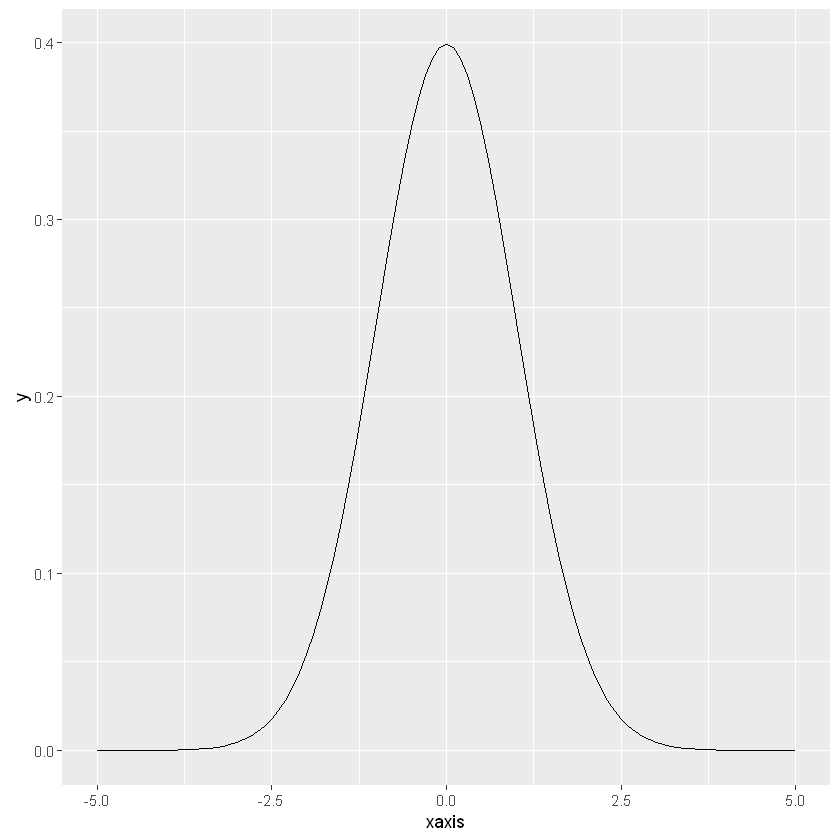

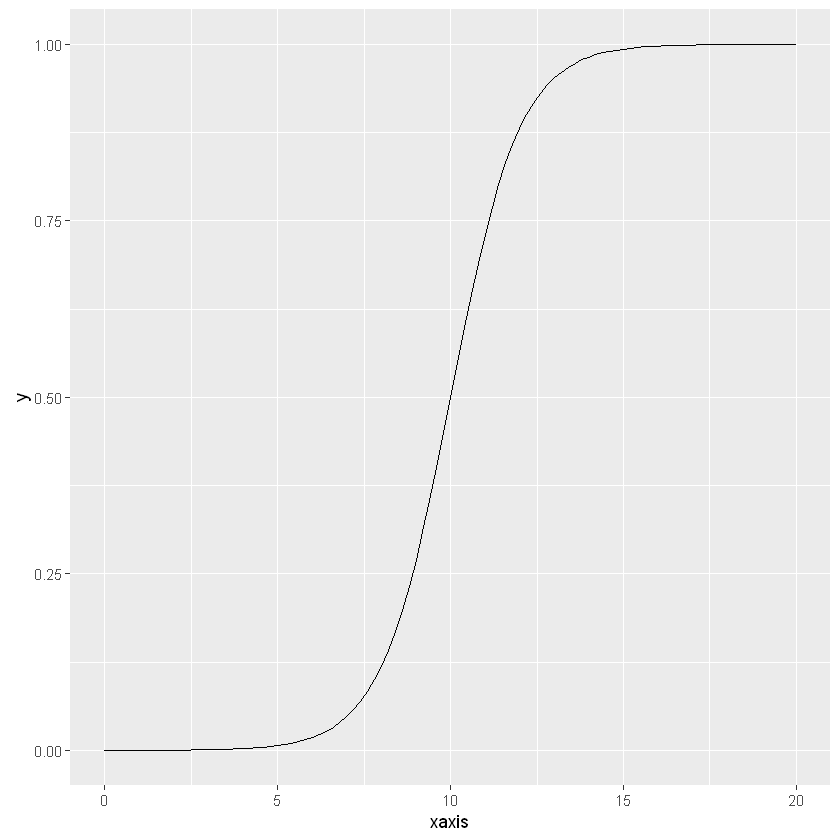

In [20]:
dummyDF <- data.frame(xaxis=c(-5,5))
ggplot(dummyDF, aes(x=xaxis))+stat_function(fun=dnorm)
customFunction <- function(xvar){
  1/(1+exp(-xvar+10))
}
dummyDF <- data.frame(xaxis=c(0,20))# limit-X
ggplot(dummyDF, aes(x=xaxis))+stat_function(fun=customFunction)

### ii. Heat map

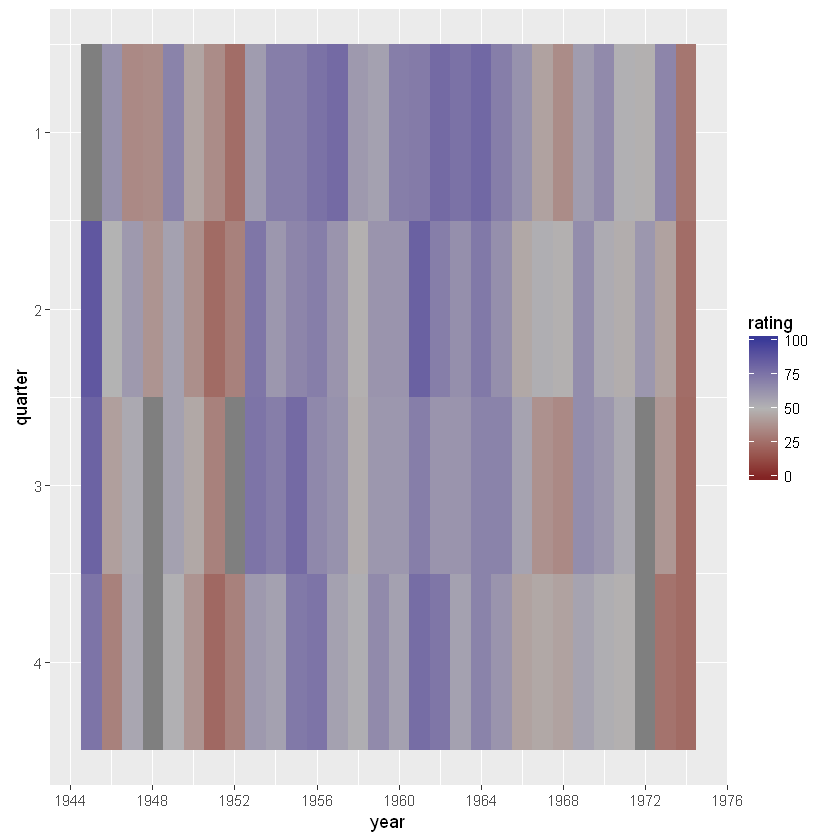

In [21]:
presidentsRating <- readRDS('../../GitHub/NTUTrainRL2/data/presidentsRating.rds')
ggplot(presidentsRating, aes(x=year, y=quarter, fill=rating))+
geom_raster()+
scale_x_continuous(breaks=seq(1940, 1976, by=4))+
scale_y_reverse()+
scale_fill_gradient2(midpoint=50, mid="grey70", limits=c(0,100))

### iii. Mosaic plot

Loading required package: grid


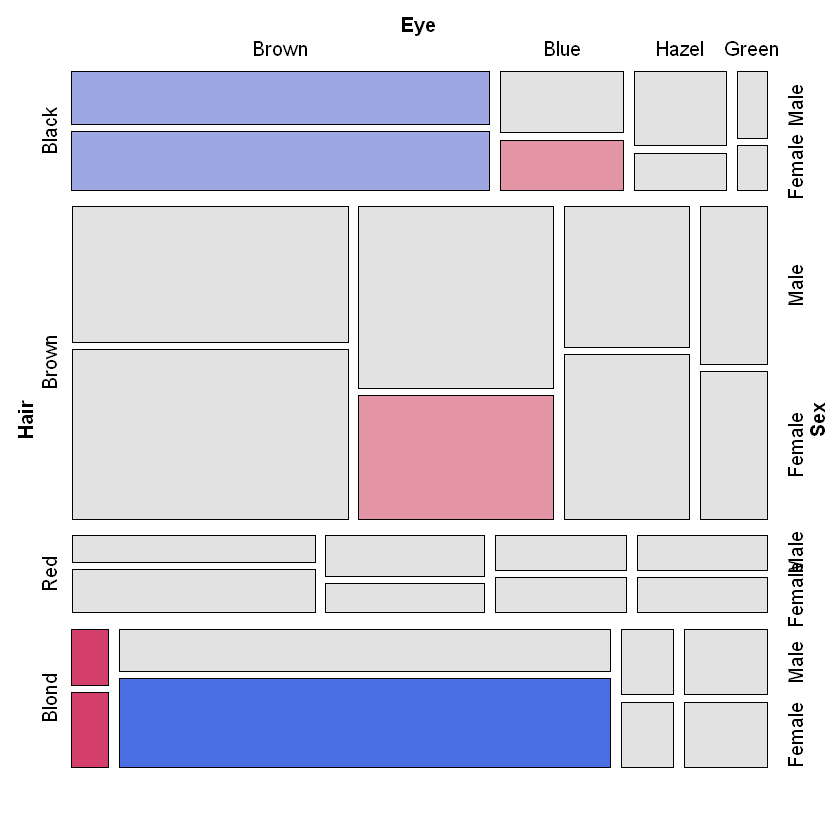

In [22]:
library(vcd)
mosaic(HairEyeColor, shade=TRUE, legend=FALSE)

# III. Interactive plot
* ## Leaflet for R (https://rstudio.github.io/leaflet/)
* ## Plotly R (https://plot.ly/r/)
* ## Shiny (http://shiny.rstudio.com/)